In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
pd.set_option('display.max_columns', 100)

In [6]:
dataset = pd.read_csv('C:/dev/Uniritter_DS/MachineLearning_I/Uniritter-ML_1_TrabalhoPratico/data/dataset.csv', delimiter=',',  low_memory=False)

# seta as variaveis que possuem os dados do dataset para o treinamento de todos os modelos
X = dataset.drop(['Cover_Type'], axis=1)
y = dataset['Cover_Type']

# Início da Analise exploratória do dataset
print("Amostra dos dados:")
print(dataset.head())


Amostra dos dados:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2804     139      9                               268   
2       2785     155     18                               242   
3       2595      45      2                               153   
4       2579     132      6                               300   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              65                             3180   
2                             118                             3090   
3                              -1                              391   
4                             -15                               67   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            234             238            135   
2            238

In [3]:
shape = dataset.shape
print("Total de Linhas e Colunas: ", shape)
sumario = dataset.describe()
print("Informações estatisticas do Dataset: ")
print(sumario)


Total de Linhas e Colunas:  (581002, 55)
Informações estatisticas do Dataset: 
           Elevation         Aspect          Slope  \
count  581002.000000  581002.000000  581002.000000   
mean     2959.371136     155.657158      14.103702   
std       279.980764     111.913616       7.488241   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581002.000000                   581002.000000   
mean                         269.429880                       46.419222   
std                          212.549971                       58.295524   
min                            0.000000                     -173.000000   
25%                          108.000000                    

Histograma com a distibuicao da classe Cover Type


Text(0, 0.5, 'Frequencia')

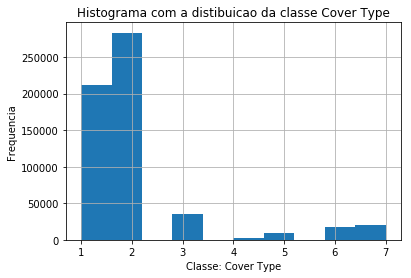

In [4]:
print("Histograma com a distibuicao da classe Cover Type")
dataset.Cover_Type.hist()
plt.title('Histograma com a distibuicao da classe Cover Type')
plt.xlabel('Classe: Cover Type')
plt.ylabel('Frequencia')

In [11]:
# KNN PURO COM CV DE 10 -- SEM TUNAGEM

from sklearn.neighbors import KNeighborsClassifier 

KNN_classifier = KNeighborsClassifier()  
KNN_classifier.fit(X, y) 

knn_cv_score_AC = cross_val_score(KNN_classifier, X, y, cv=10, scoring='accuracy')
print("Acuracia KNN Com CV:", knn_cv_score_AC.mean())  

Acuracia KNN Com CV: 0.5414039569515248


In [10]:
# NAIVE BAYES PURO COM CV DE 10 -- SEM TUNAGEM

from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X, y)

naive_cv_score_AC = cross_val_score(naive, X, y, cv=10, scoring='accuracy')
print("Acuracia Naive Com CV:", naive_cv_score_AC.mean())  


Acuracia Naive Com CV: 0.4420708082441541


In [12]:
# DECISION TREE CLASSIFIER PURO COM CV 10 -- SEM TUNAGEM

from sklearn.tree import DecisionTreeClassifier 

Tree_classifier = DecisionTreeClassifier()  
Tree_classifier.fit(X, y) 

scores = cross_val_score(Tree_classifier, X, y, cv=10, scoring='accuracy')
print("Acuracia Decision Com CV:",scores.mean()) 

Acuracia Decision Com CV: 0.5909975308478685


In [ ]:
# GRID SEARCH PARA O KNN

from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': [3,5,11,19],
               'weights': ['uniform','distance'],
               'metric': ['euclidean', 'manhattan']
               }
gs = GridSearchCV(KNeighborsClassifier(),                  
                  grid_params,
                  verbose=1,
                  cv=2,
                  n_jobs=-1
                  )

gs_results = gs.fit(X,y)
#gs_results_estimator = gs_results.best_estimator_
gs_results_params = gs_results.best_params_


#print("Best KNN Estimator: {}".format(gs_results_estimator))
print("Tuned Best KNN Parameters: {}".format(gs_results_params))
print("Best KNN Score is {}".format(gs_results.best_score_))

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# GRID SEARCH PARA O DECISION TREE

grid_params_tree = {"max_depth": [3, 5, 10],
              "max_features": [ 3, 5, 10, 15, 20],
              "min_samples_leaf": [1, 3],
              "criterion": ["gini", "entropy"]
              } 

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()  

tree_cv = GridSearchCV(tree, grid_params_tree, cv = 10, n_jobs=-1)  

tree_cv.fit(X, y)  

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
